# House Prices Prediction using Random Forest and Multi-Linear Regression

This notebook train a baseline Random Forest model using scikit-learn Decision Forests on the House Prices dataset made available for the final exam.

## Project topic
### what the project is about 
This project is how to train a ML model using scikit-learn Random Forest Regressor and the Multi-Linear Regression on the House Prices dataset made available for this final exam, involving EDA, modeling and visualization.
###  the type of learning/algorithms
As an important supervised machine learning method, random Forests are a family of tree-based models including Random Forests and Gradient Boosted Trees. They are good options to work with tabular data, and will often provide a strong baseline. The Multi-Linear Regression is the basis of a mass of ML algorithms.
### the type of task
 `smf.ols`for the Multi-Linear Regression  and `Sklearn.RandomForestRegressor` Random forests regressor are two appropriate types for us to predict the sale prices. And R2 will be used to evaluate the efficiency of the model. 
### the goal of the project 
This project will utilize the dataset about house price containing 81 features to analyse the correlationship between different factors and the importance of each factors to determine the sale price of a house. Then, we will build 2 proper models to predict the sale prices.

## Import the library

In [175]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone 
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import graphviz
%matplotlib inline 

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

## Data
### data source
The dataset is cited from kaggle, a competetion named 'House Prices - Advanced Regression Techniques'. The link is https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

### data description
The data is composed of 81 columns and 1460 entries, 957.39 kB. There are 3 types of the data, including 'int','float64' and 'object'. From the aspect of data type of each feature, there are 43 categorical, 36 numeric features respective. And it's not multi-table form.

We will show the information shown above with the coding as follows:
#### Load the dataset


In [176]:
train_file_path = "../input/house-prices-advanced-regression-techniques/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions of our dataset by printing out the first 3 entries. In addition to 'Id' and '`SalePrice`,There are 79 feature columns. Using these features our model could predict the house sale price indicated by the label column named `SalePrice`.

In [177]:
dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


We will drop the `Id` column as it is not necessary for model training.

In [178]:
dataset_df = dataset_df.drop('Id', axis=1) #drop the `Id` column
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


We can inspect the types of feature columns using the following code:

In [179]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## House Price Distribution

Now let us take a look at how the house prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

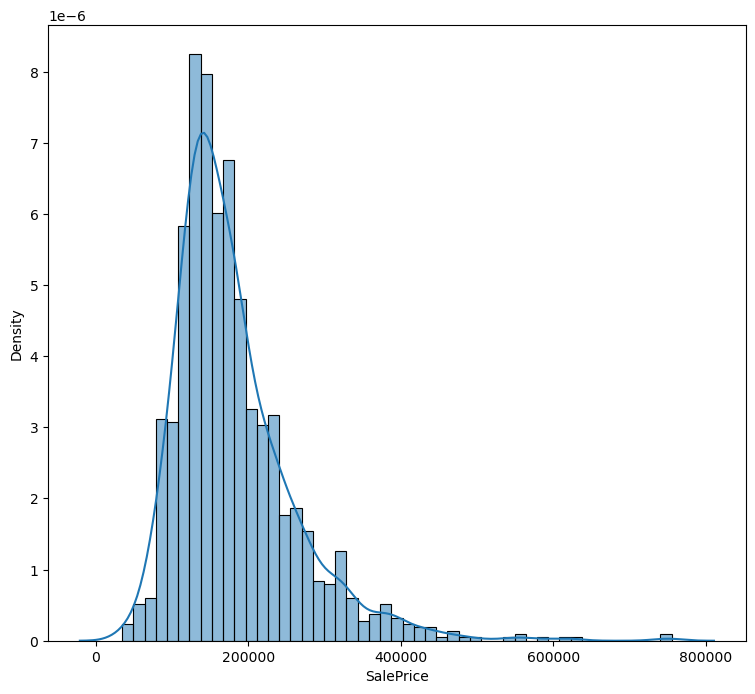

In [180]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset_df['SalePrice'], kde=True,stat="density", kde_kws=dict(cut=3))  #how the house prices are distributed

## Data cleaning 
This part will practice data cleaning and Exploratory Data Analysis (EDA) using a house price dataset and mpg dataset.<br>
The first dataset is from a Kaggle competition (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), where the task is to predict a house sale price given house features.

In order to express more clearly,in every step next, we will discuss and explain benifits and  measures to handle the datas and what handicaps we will encounter.

### Drop observations improper
This part will  check the observations that contain null values.If an observation is imposed of too many missing values and be imputed with other ones, it will decrease the performance of the model.  Hnece, when the proportion of null values of a observation is more than 10 percents, we will drop it.

The code is as follows.

In [181]:
account_null_value=list()
account_null_value_sum=0
drop_index=list()
Total_observations=dataset_df.shape[0]  # the number of observation
Total_features=dataset_df.shape[1]     #the number of features
drop_proportion=0.1
for c in range(Total_observations):
    null_values_sum=dataset_df.iloc[c].isnull().sum()  #The total quantity of each observation
    account_null_value.append(null_values_sum)
    if null_values_sum>0:
        account_null_value_sum=account_null_value_sum+1
        if null_values_sum>Total_features*drop_proportion:
            drop_index.append(c)
dataset_df=dataset_df.drop(drop_index)  

### Drop and impute features
This part will  check the features that contain null values.If an feature is imposed of too many missing values, it will be invalid to be dropped. However, missing value is inevitable, if the amout is acceptable, we will impute the null value. Empirically, 10% is a reasonable standard.

The code is as follows.

LotFrontage      246
Alley           1271
MasVnrType         8
MasVnrArea         8
BsmtQual           2
BsmtCond           2
BsmtExposure       3
BsmtFinType1       2
BsmtFinType2       3
Electrical         1
FireplaceQu      597
GarageType         3
GarageYrBlt        3
GarageFinish       3
GarageQual         3
GarageCond         3
PoolQC          1347
Fence           1089
MiscFeature     1304
dtype: int64
feature_to_drop: dict_keys(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
feature_to_impute: dict_keys(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'])


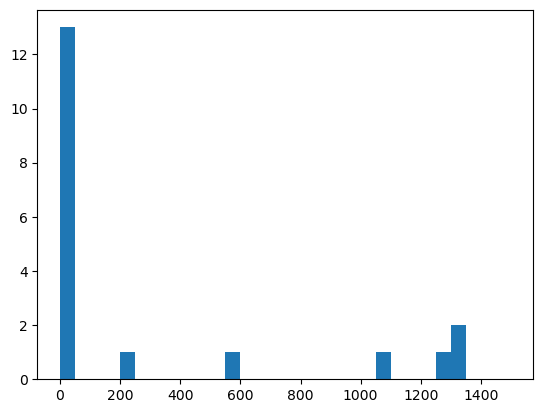

In [182]:
Total_observations=dataset_df.shape[0]
Total_features=dataset_df.shape[1]
drop_proportion=0.1                                         # the threshold to drop the feature
drop_threshold=drop_proportion*Total_observations
feature_counts = dataset_df.isnull().sum()                  # the number of missing values
feature_null_counts = feature_counts[feature_counts > 0]
print(feature_null_counts)
#backup codes:null_counts = pd.Series(feature_null_counts)
histogram= plt.hist(x=feature_null_counts, bins=np.arange(0, 1550, 50))
#backup codes:print(histogram[0])
feature_to_drop = dict(feature_null_counts[feature_null_counts >drop_threshold]).keys()
feature_to_fill=dict(feature_null_counts[feature_null_counts<=drop_threshold]).keys()
print('feature_to_drop:',feature_to_drop)
print('feature_to_impute:',feature_to_fill)

#drop the feature that the miss values is more than drop_threshold
for c in feature_to_drop:
    dataset_df=dataset_df.drop(c,axis=1)
#impute the feature that the missing values is less than drop_threshold
for c in feature_to_fill:
    if dataset_df[c].dtype== 'float64':
        value_to_impute=dataset_df[c].median()
        dataset_df.fillna({c:value_to_impute},inplace=True)
    else:
        value_to_impute=dataset_df[c].mode().iloc[0]
        dataset_df.fillna({c:value_to_impute},inplace=True)

### Data type munging

We will now take a look at how the feature types are distributed. let us first list all the types of data from our dataset and find that more than half of the features are object, which means that majority of the dataset is invalid. in order to utilize as more as possible features to participate in computation,we will transform object datas to the numerical ones.

The code is as follows.

#### the distribution of types

In [183]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

#### transform object datas to the numerical ones

In [184]:
#print(dataset_df)
le = preprocessing.LabelEncoder()     # change the type of object datas
for c in dataset_df:
    if dataset_df[c].dtypes==object:
            value_dtype=dataset_df[c].unique()  # statistic the values
            le.fit(value_dtype)
            dataset_df_t=dataset_df[c].tolist()  
            dataset_df_t1=le.transform(dataset_df_t) # transform the type
            dataset_df[c]=dataset_df_t1



## Exploratory Data Analysis (EDA)

### the distribution for all the features.
We can clearly see the characters of all the features throught the histgram. Therefore, we realize it utilize the function 'hist'.

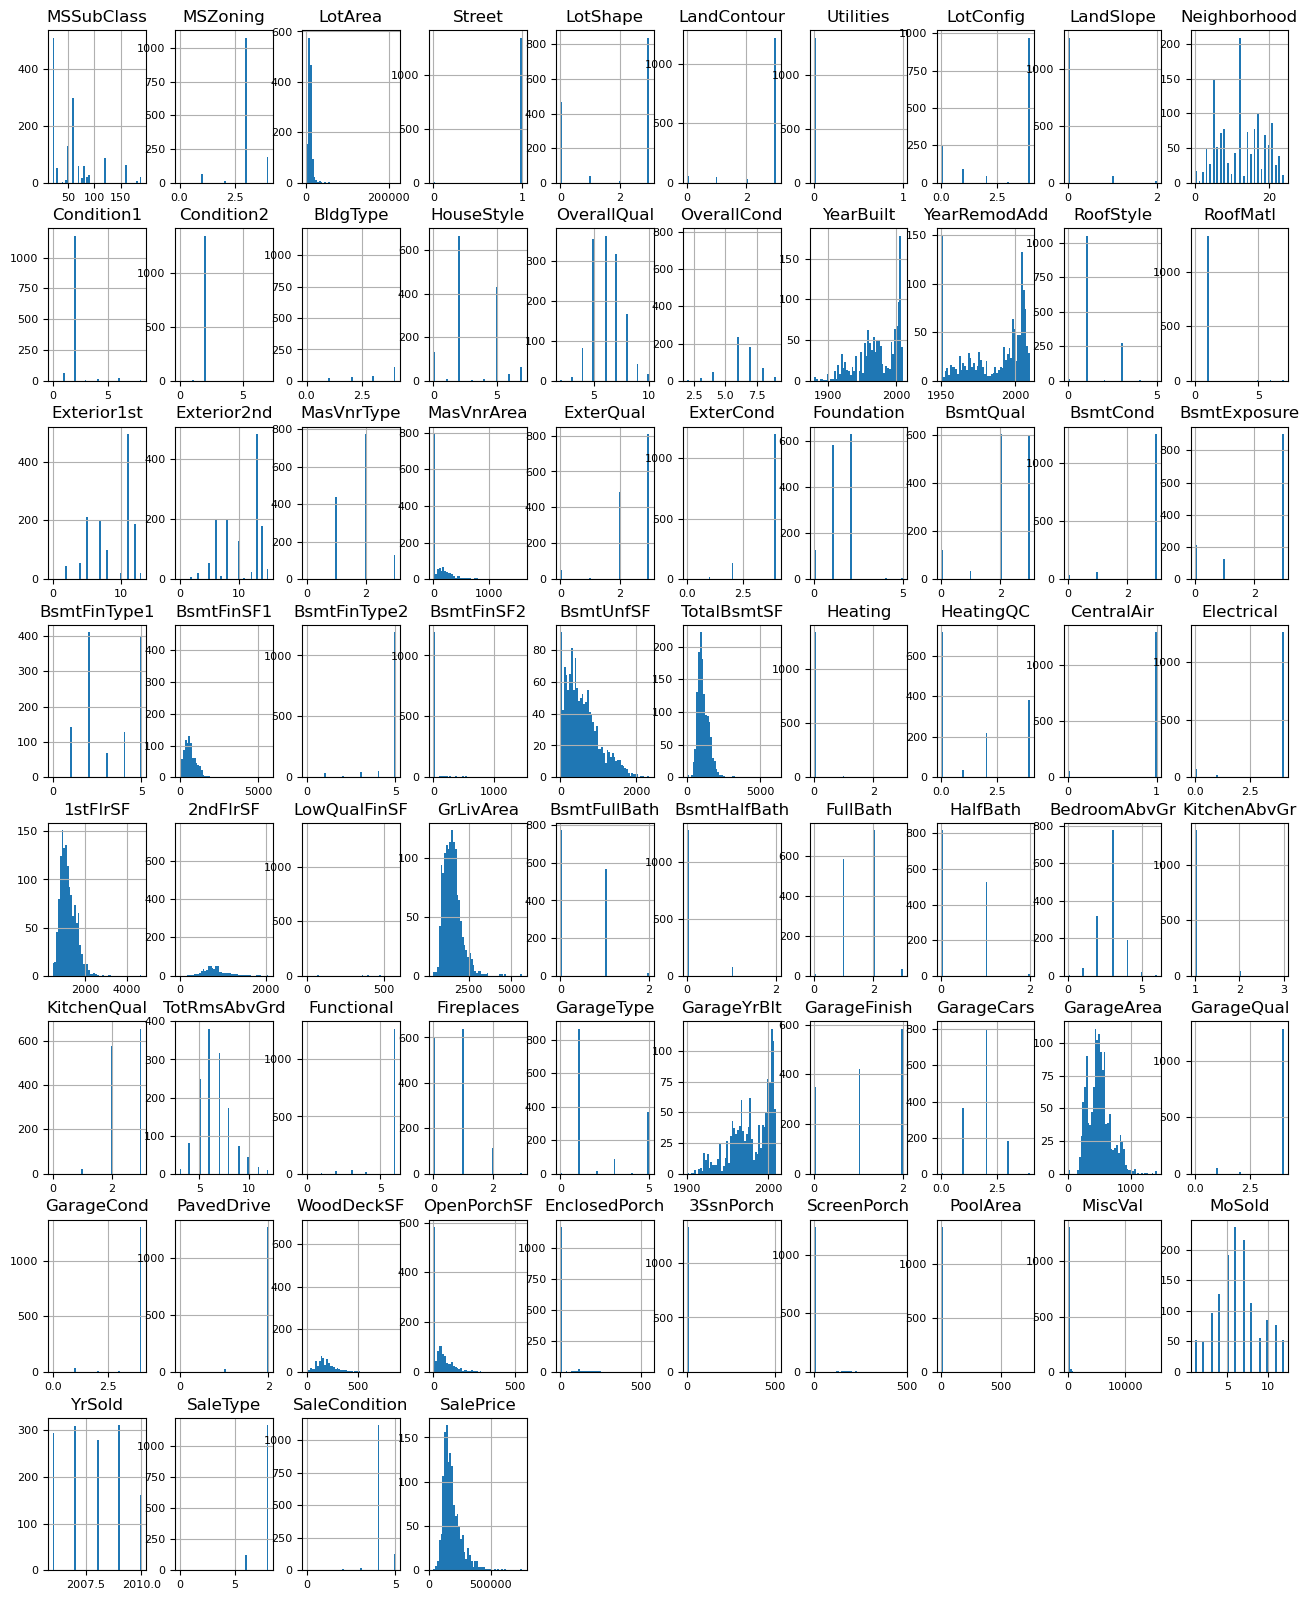

In [185]:
dataset_df.hist(figsize=(16, 20), bins=50, layout=(8,10),xlabelsize=8, ylabelsize=8);

### Correlation Matrix
The matrix will intuitively display  the relationship of the different factors, then we can evaluate whether the datas after being mugged is reasonable and useful for us to move forward. We choose the heatmap to realize our purpose as below.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

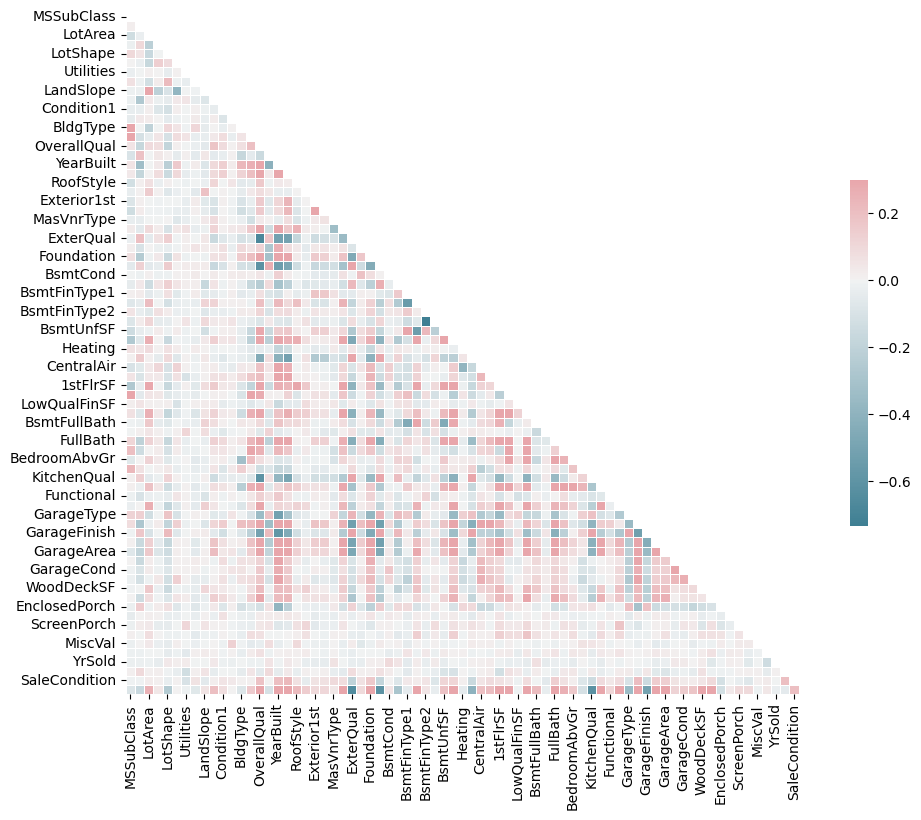

In [186]:
corr = dataset_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Analysis and Conclusion

From the correlation metric, we can find that garagecars, bsmtQual and KitchenAbvGr are the most relevant parameters to SalePrice. Meanwhile,  the correlations between different features are small, demonstrate that most of the parameters  are independent, leading to smaller varience. Hence, the datas cleaned are not only deverse but also robust,In conclusion, the dataset is proper for us to model in the next section.  

## Models

### Prepare the dataset

This dataset contains a mix of numeric, categorical and missing features. And we have transformed them to numeric, and sk.tree supports the numeric type , and no preprocessing is required. We can go forward to model directly.

### split the dataset into training and testing datasets:

In [187]:

train_data_x, test_data_x,train_data_y,test_data_y = train_test_split(dataset_df.drop('SalePrice',axis=1),dataset_df['SalePrice'])
print("{} examples in training, {} examples in testing.".format(
    len(train_data_x), len(test_data_y)))

1015 examples in training, 339 examples in testing.


##  RandomForest

There are several tree-based models for you to choose from.

* RandomForestModel
* GradientBoostedTreesModel
* CartModel
* DistributedGradientBoostedTreesModel

To start, we'll work with a Random Forest. This is the most well-known of the Decision Forest training algorithms.

A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement). The algorithm is unique in that it is robust to overfitting, and easy to use.

### Create a Random Forest

Today, we will use the defaults to create the Random Forest Model while specifiyng the task type as `Sklearn.RandomForestRegressor`.

In [188]:

random_tree=RandomForestRegressor(n_estimators=300,  criterion='squared_error', max_depth=3,
                                             min_samples_split=2,max_features=20, bootstrap=True, 
                                             oob_score=True,  random_state=22)

### Train the model

We will train the model using a one-liner.

Note: you may see a warning about Autograph. You can safely ignore this, it will be fixed in the next release.

In [189]:

random_tree.fit(train_data_x,train_data_y)
a=random_tree.n_outputs_


### Visualize the model
One benefit of tree-based models is that you can easily visualize them. The default number of trees used in the Random Forests is 300. We can select a tree to display below.

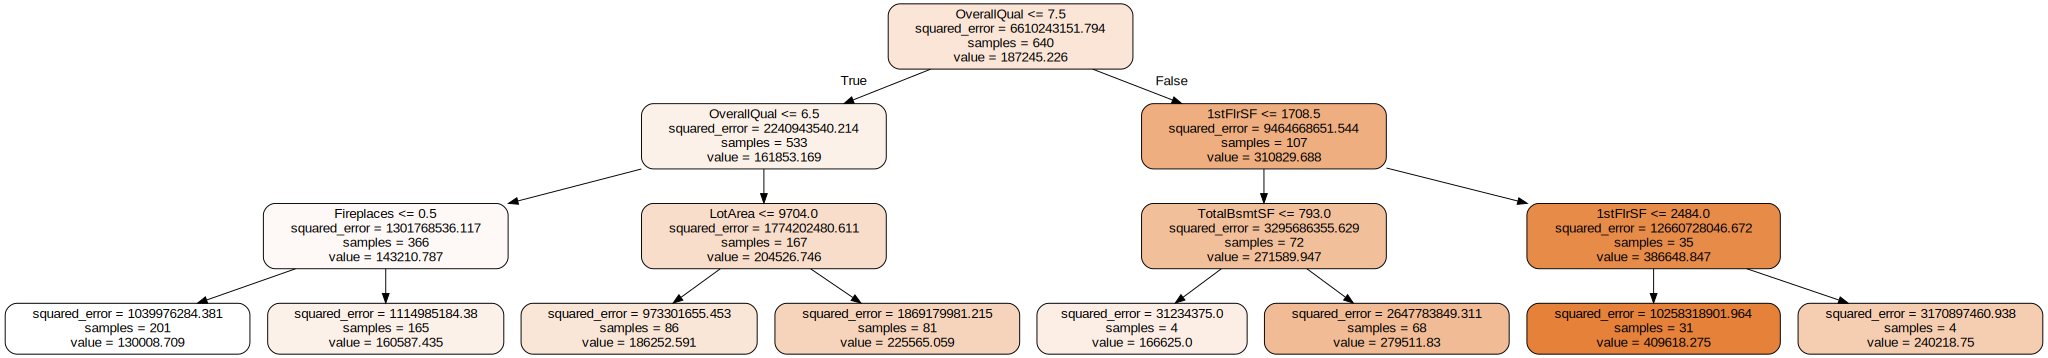

In [190]:


DT = random_tree.estimators_[0]
dot_data = tree.export_graphviz(DT,feature_names=train_data_x.columns,filled = True
                                ,rounded = True)
graph = graphviz.Source(dot_data)
graph



###  Hyperparameter tuning and Evaluate the model on the OOB  and the Cross validation

#### Hyperparameter tuning
n_estimators is the most significant htperparameter to dicide the performance of the model. To tune the model, We search the n_estimators in the range (100,300) to pursue the optimal hyperparmeter.

#### Evaluate the model on the OOB  and the Cross validation(CV)
Before training the dataset we have manually seperated 25% of the dataset for validation .

We can also use Out of bag (OOB) score and cross validation(CV) to validate our RandomForestModel.
To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB).OOB score is computed on the OOB data. Meanwhile, cross validation(CV) will test the data with k-folder.

Note: Smaller values are better for this hyperparameter.

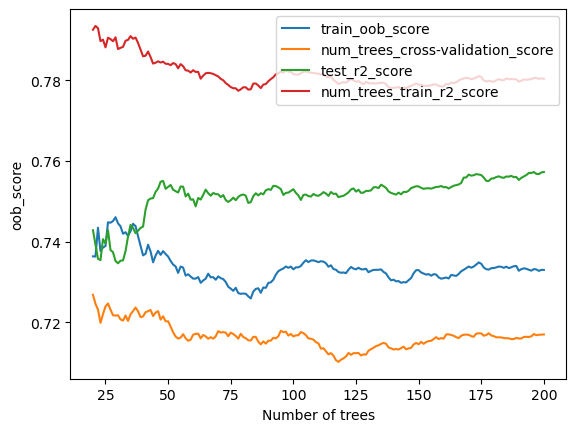

In [191]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score


num_trees_train_score=list()
num_trees_test_score=list()
num_trees_train_score_predict=list()
num_trees_cross_validation_score=list()
num_trees_test_error=list()
num_trees_train_error=list()
# the loop to model and fit to find out the optimization for n_estimators
for i in range(20,201):
    random_tree=RandomForestRegressor(n_estimators=i,  criterion='squared_error', max_depth=3,
                                             min_samples_split=2,max_features='sqrt', bootstrap=True, 
                                             oob_score=True,  random_state=22)
    random_tree.fit(train_data_x,train_data_y)
    scores = cross_val_score(random_tree,train_data_x,train_data_y, cv=3)
    num_trees_cross_validation_score.append(np.mean(scores))
    num_trees_train_score.append(random_tree.oob_score_)
    test_pred=random_tree.predict(test_data_x)
    num_trees_test_score.append(r2_score(test_data_y,test_pred))
    train_pred=random_tree.predict(train_data_x)
    num_trees_train_score_predict.append(r2_score(train_data_y,train_pred))
    num_trees_test_error.append(mean_absolute_error(test_data_y,test_pred))
    num_trees_train_error.append(mean_absolute_error(train_data_y,train_pred))
#plot the curve of the r2 and error
plt.plot(range(20,201),num_trees_train_score,label='train_oob_score')
plt.plot(range(20,201),num_trees_cross_validation_score,label='num_trees_cross-validation_score')
plt.plot(range(20,201), num_trees_test_score,label='test_r2_score')
plt.plot(range(20,201),num_trees_train_score_predict,label='num_trees_train_r2_score')

plt.legend()
plt.xlabel("Number of trees")
plt.ylabel("oob_score")
plt.show()

## Variable importances

Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using  Decision Forests.
Let us list the available `Variable Importances` for Decision Trees:

In [192]:
random_tree=RandomForestRegressor(n_estimators=50,  criterion='squared_error', max_depth=3,
                                             min_samples_split=2,max_features=20, bootstrap=True, 
                                             oob_score=True,  random_state=22)
random_tree.fit(train_data_x,train_data_y)
print(f"Available variable importances:")
#print(random_tree.feature_importances_)
random_tree.feature_names_in_
feature_names =random_tree.feature_names_in_
feature_importances =random_tree.feature_importances_
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))
importance_list=dict(zip(feature_names, feature_importances))
importance_list=pd.DataFrame(importance_list,index=['feature_importances']).T
importance_ranked=importance_list.sort_values(by="feature_importances",axis=0,ascending=False)
importance_top=importance_ranked.head(10)
importance_top_value=importance_top['feature_importances'].tolist()
importance_top_names=importance_top.index.tolist()
feature_ranks = range(len(importance_top_names))
print(importance_top)

Available variable importances:
             feature_importances
OverallQual             0.308057
GrLivArea               0.136324
ExterQual               0.095815
BsmtQual                0.089240
GarageCars              0.075066
1stFlrSF                0.050612
YearBuilt               0.042681
FullBath                0.041479
TotalBsmtSF             0.038530
2ndFlrSF                0.031475


As an example, let us display the important features for the Variable Importance.

The larger the importance score for `NUM_AS_ROOT`, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

## Multi-Linear Regression 

As shown above, we choose 5 most importance features to implement Multi-Linear Regression.

In [158]:

import statsmodels.formula.api as smf
features_selected = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','ExterQual','SalePrice']  # the features selected according to the importance


### Create and train the model

Today, we will use the defaults to create the Multi-Linear Regression  while specifiyng the task type as `smf.ols`.

In [156]:
model = smf.ols('SalePrice ~OverallQual+GrLivArea+GarageCars+TotalBsmtSF+ExterQual',data=dataset_df).fit()  

### The summary of the model

We can understand the model throught the results of the summary.

In [157]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     885.9
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:10:33   Log-Likelihood:                -16205.
No. Observations:                1354   AIC:                         3.242e+04
Df Residuals:                    1348   BIC:                         3.245e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.293e+04   1.11e+04     -2.969      

### test statistics analysis
According to the summary, the R-squared is 0.742,smaller then the random forest. In the same time, coefficients of every feature is approximate 0, out of rejection region. Consequently, the model is proper to predict the SalePrices of the House.

## Results and Analysis
### Ramdom forest
AS is shown below, According to the Hyperparameter tuning, we can see  when tree_number is 50, the r-squared value is relative small and conputation is also appropriate. Comprehensively, 50 esitimator is the optimal parameter for this model. In the next phrase, we train the random forest with the estimator=50, and get some metrics to evaluate the performance.The values are listed as follows:
cross validation score: 0.7559996455808135 
oob_score_: 0.7354935965288734 
test_r2_score: 0.7163508791072664 
train_r2_score: 0.7941724187369974 
test_mean_absolute_error: 26089.784037190464 
train_mean_absolute_error: 24263.0402613971

Althrought no matter the scores of test data or train data is less than 0.8, yet lager than 0.7. And the ablolute_error is stable 


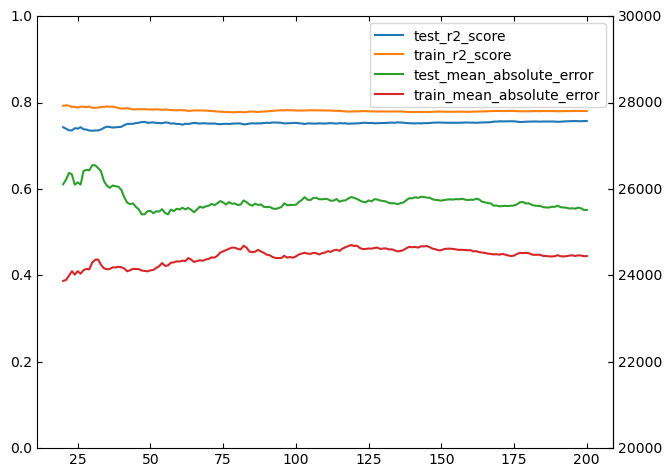

In [193]:
# plot the values of random forest to evaluate the performance

from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
fig = plt.figure(1) 
ax_k = HostAxes(fig, [0, 0, 0.9, 0.9])
ax_p = ParasiteAxes(ax_k, sharex=ax_k)
ax_K = ParasiteAxes(ax_k, sharex=ax_k)
ax_k.parasites.append(ax_p)
ax_k.parasites.append(ax_K)

ax_p.axis['right'].major_ticklabels.set_visible(True)
#ax_p.axis['right'].set_visible(True)
ax_K.axis['right'].major_ticklabels.set_visible(True)
ax_K.axis['right'].set_visible(True)
ax_K.set_ylabel('error')
fig.add_axes(ax_k)
ax_p.set_ylim(0,1)
ax_K.set_ylim(20000,30000)

ax_k.legend(labelspacing = 0.4, fontsize = 10)
ax_p.plot(range(20,201),num_trees_test_score,label='test_r2_score')
ax_p.plot(range(20,201),num_trees_train_score_predict,label='train_r2_score')
ax_K.plot(range(20,201),num_trees_test_error,label='test_mean_absolute_error')
ax_K.plot(range(20,201),num_trees_train_error,label='train_mean_absolute_error')
ax_k.legend(labelspacing = 0.4, fontsize = 10)
plt.show()

In [194]:
random_tree_120=RandomForestRegressor(n_estimators=50,  criterion='squared_error', max_depth=3,
                                             min_samples_split=2,max_features='sqrt', bootstrap=True, 
                                             oob_score=True,  random_state=22)
random_tree_120.fit(train_data_x,train_data_y)
scores = cross_val_score(random_tree,train_data_x,train_data_y, cv=3)
print('cross validation score:',np.mean(scores),'oob_score_:',random_tree_120.oob_score_,'test_r2_score:',r2_score(test_data_y,test_pred),
      'train_r2_score:',r2_score(train_data_y,train_pred),'test_mean_absolute_error:',mean_absolute_error(test_data_y,test_pred),
      'train_mean_absolute_error:',mean_absolute_error(train_data_y,train_pred))

cross validation score: 0.7321646928646276 oob_score_: 0.7363104064653063 test_r2_score: 0.7572586277232128 train_r2_score: 0.7803485697451489 test_mean_absolute_error: 25513.97083307672 train_mean_absolute_error: 24445.733017640676



#### Variable importances
We can analyse the importance of different factors, which can help us to understand the problem and gain deeper information for further discussion and investigation.
Plot the variable importances from the inspector using Matplotlib

Available variable importances:
             feature_importances
OverallQual             0.308057
GrLivArea               0.136324
ExterQual               0.095815
BsmtQual                0.089240
GarageCars              0.075066 ['OverallQual', 'GrLivArea', 'ExterQual', 'BsmtQual', 'GarageCars']


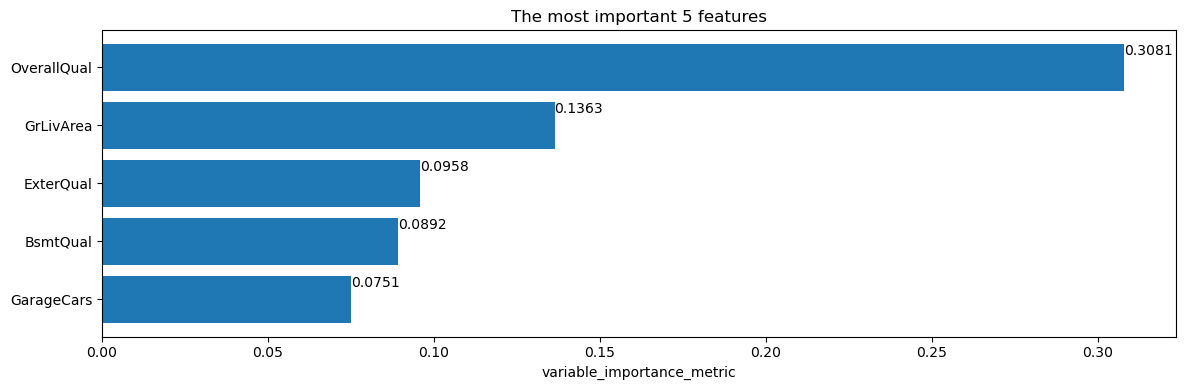

In [195]:
plt.figure(figsize=(12, 4))


print(f"Available variable importances:")
#print(random_tree.feature_importances_)
random_tree.feature_names_in_
feature_names =random_tree.feature_names_in_
feature_importances =random_tree.feature_importances_
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))
importance_list=dict(zip(feature_names, feature_importances))
importance_list=pd.DataFrame(importance_list,index=['feature_importances']).T
importance_ranked=importance_list.sort_values(by="feature_importances",axis=0,ascending=False)
importance_top=importance_ranked.head(5)
importance_top_value=importance_top['feature_importances'].tolist()
importance_top_names=importance_top.index.tolist()
feature_ranks = range(len(importance_top_names))
print(importance_top,importance_top_names)
bar = plt.barh(feature_ranks[0:5], importance_top_value, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, importance_top_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(importance_top_value, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel('variable_importance_metric')
plt.title("The most important 5 features")
plt.tight_layout()
plt.show()

As is shown above, we can get the metrics for the optimal parameters of the random forest. R2-squared is acceptable to predict the house price. And according to the 5 most important paramters histogram，we could find some interesting things that garegecars is an outstanding factors in the prediction.It seems 

### multi-linear regressor

The summary of says that The condition number is large, 21500. This might indicate that there are strong multicollinearity or other numerical problems. To solve this problem, pairplot is an effective tool to show the correlations of the features.


['OverallQual', 'GrLivArea', 'ExterQual', 'BsmtQual', 'GarageCars']


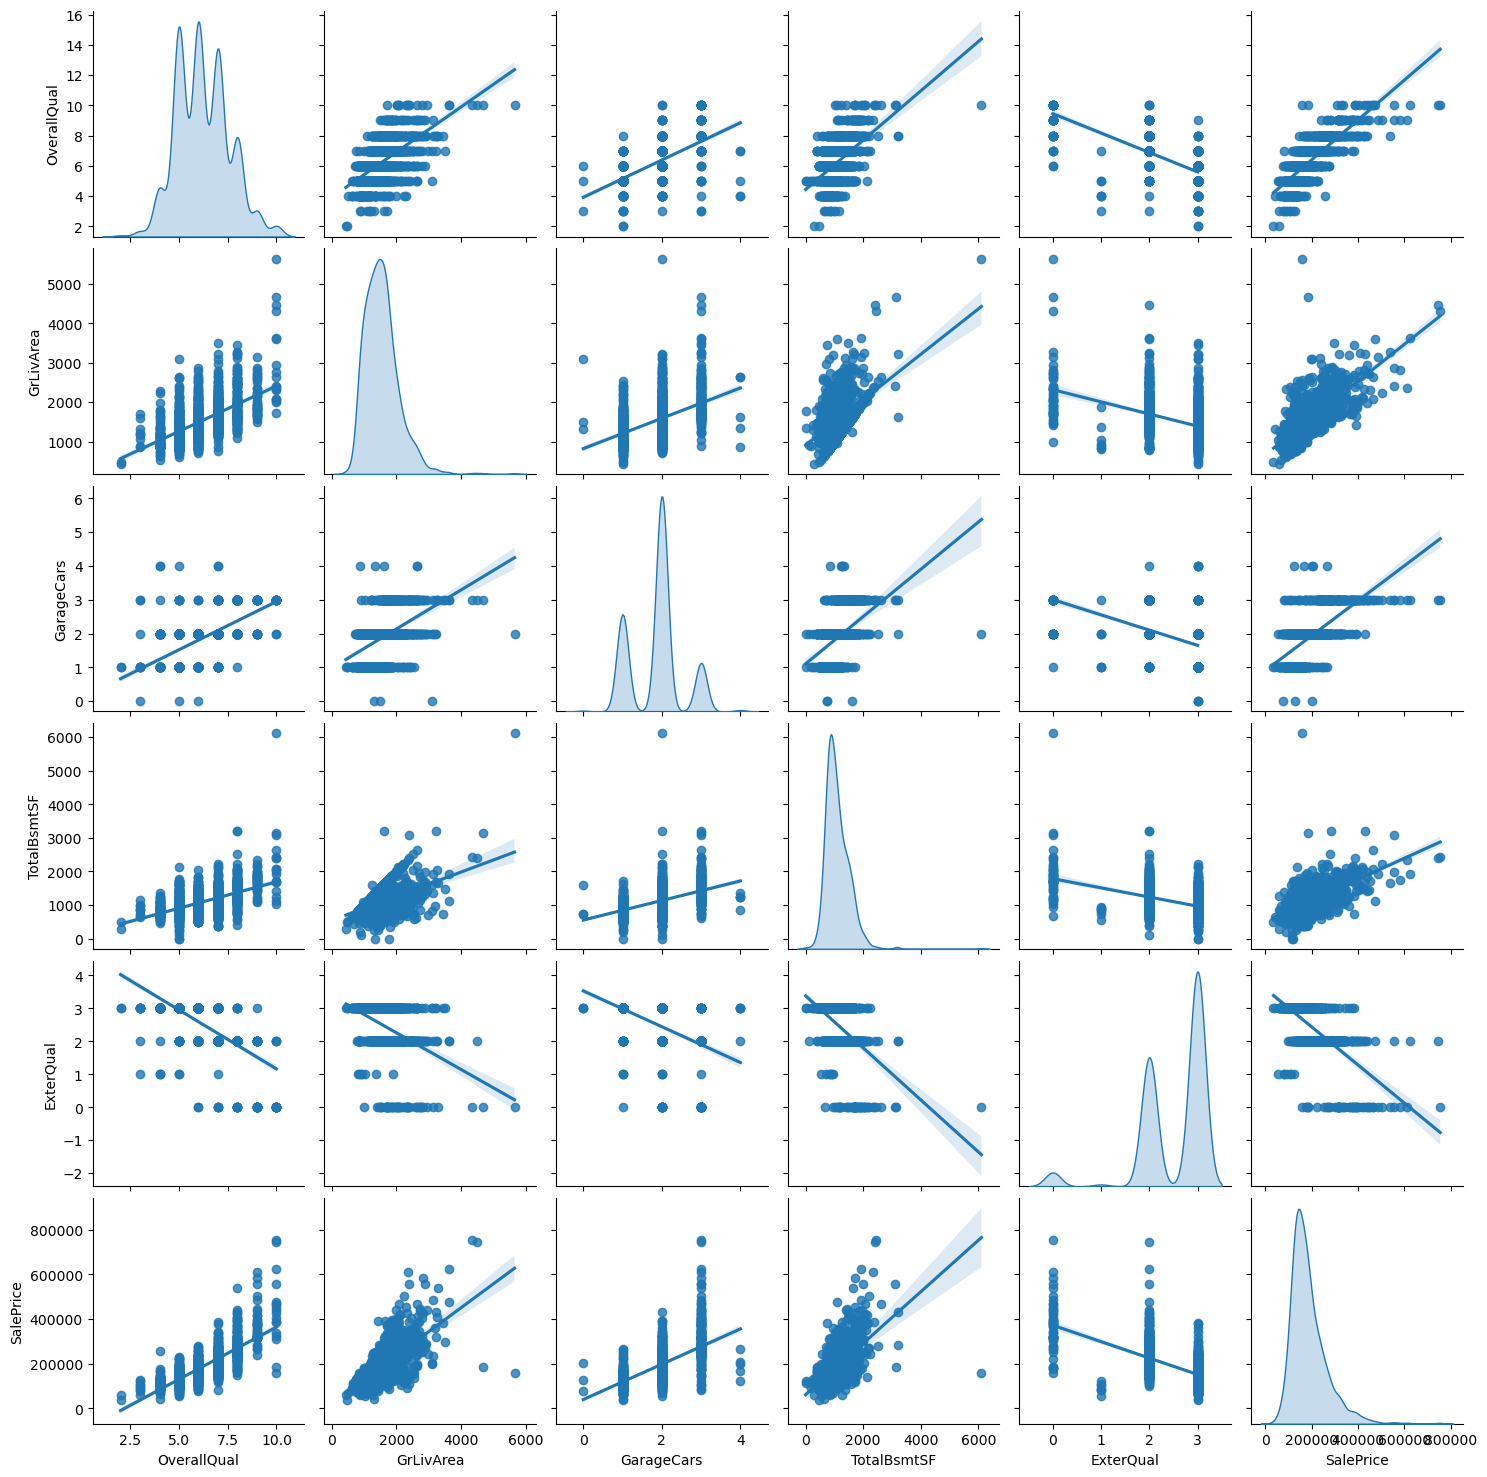

In [196]:
print(importance_top_names)
sns.pairplot(dataset_df[features_selected],diag_kind="kde",kind='reg')
plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')

#### method to improve performance
Intuitively, the GrLivArea is highly related with TotalBsmtSf. The TotalBsmtSf means total square feet of basement area, and GrLivArea means above grade (ground) living area square feet. They are all about the size of space of the house. Generely, if a house's area is large on the groud, it always equiped with a big basement. Naturely, we drop the TotalBsmtSf feature and remodel again.

In [209]:
model = smf.ols('SalePrice ~OverallQual+GrLivArea+GarageCars+TotalBsmtSF',data=dataset_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     1039.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:26:22   Log-Likelihood:                -16238.
No. Observations:                1354   AIC:                         3.249e+04
Df Residuals:                    1349   BIC:                         3.251e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.144e+05   5117.360    -22.348      

We drop the feature ExterQual and operate the model again. R-squared change slightly from 0.764 to 0.755, whereas the condition number decreased to 9600 and all p-values are 0. 

## Discussion and Conclusion
In conclusion, the performance of 2 different machine learning method is similar, with r-squared approximately equated to 0.75. And the errors are both acceptable.

In order to optimize the model, we used 2 ways to search the best parameters. In random forest, we utilized loop to verify the results with numbers in a range respectively and estimator = 50 is reasonable. Then, we used some tools to evaluate the correlationships and importances of features, and improved the efficiency by selecting proper features.

In the random forest, we can't recuded the running time to be the same as the multi-linear regressor, due to the number of trees must be sufficient to narrow varience and bias and to improve the accuracy.